In [1]:
# Import libraries
import math
import networkx as nx
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from shapely.geometry import Point

np.random.seed(42)

In [2]:
def generate_path(length, flip=False):

    x_vals = np.linspace(-1, 3, length)
    y_vals = np.sin(x_vals)
    if flip:
        y_vals =np.cos(x_vals)

    reading = np.around(np.vstack((x_vals + 2, y_vals + 3)), decimals=2)
    reading = reading.T

    return reading


In [3]:
# Plot tracks path
def plot_paths(target_0, target_1, circumference_record):
    # Separate each axis data
    x_coord_0 = [x[0] for x in target_0]
    y_coord_0 = [x[1] for x in target_0]

    x_coord_1 = [x[0] for x in target_1]
    y_coord_1 = [x[1] for x in target_1]
    
    # Initialize Plotly Fig object
    fig = go.Figure()
    # Add scatter plot for the sensor data
    fig.add_trace(go.Scatter(x=x_coord_0, y=y_coord_0, mode="markers", name='Target 1 detections'))
    fig.add_trace(go.Scatter(x=x_coord_0, y=y_coord_0, mode="lines",  name='Target 1 track'))
    fig.add_trace(go.Scatter(x=x_coord_1, y=y_coord_1, mode="markers",  name='Target 2 detections'))
    fig.add_trace(go.Scatter(x=x_coord_1, y=y_coord_1, mode="lines",  name='Target 2 track'))
    
    if circumference_record:
        flat_list = [item for sublist in circumference_record for item in sublist]
        fig.add_trace(go.Scatter(x=[x[0] for x in flat_list], y=[x[1] for x in flat_list], mode='lines',  name='Gates'))
    
    fig.update_layout(
        width=1000,
        height=850,
        title="Actual Targets Plot",
        xaxis_title="x axis",
        yaxis_title="y axis",
        xaxis_range=[0, 6],
        yaxis_range=[0, 6],
        legend_title="Detections and Tracks",
    )

    fig.show()

In [4]:

if __name__ == "__main__":
    duration = 20
    dims = 2
    num_targets = 2

    # As targets are known, we initialize two local hypothesis
    target_0 = generate_path(duration,)
    target_1 = generate_path(duration, True)
    
#     plot_paths(target_0, target_1, False)

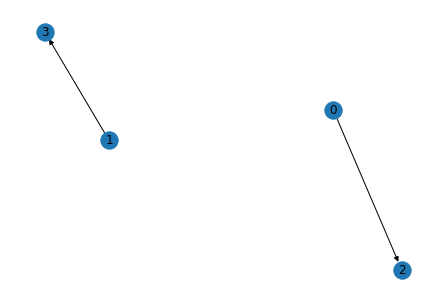

In [7]:
    
    # Initialize graph object
    G = nx.DiGraph()
    
    # Gating size
    buffer_size = 0.2
    
    # Initialize data container for gating detections
    gating = []
    
    # Gating area for plotting
    circumference_record = []
    
    # Now, iterate through the detections and update local hypothesis based on shortest distance
    for time_, j in enumerate(zip(target_0, target_1)):
        if time_ == 0:
            G.add_node(0, loc=j[0].tolist())
            gater_0 = Point(j[0].tolist()).buffer(buffer_size)
            gating.append((0, gater_0))
            
            G.add_node(1, loc=j[1].tolist())
            gater_1 = Point(j[1].tolist()).buffer(buffer_size)
            gating.append((1, gater_1))
            

        elif time_ < 2:
            # First detected target
            G.add_node(len(G.nodes), loc=j[0])
            detection_0 = Point(j[0].tolist())
            gater_0 = detection_0.buffer(buffer_size)
            for i in gating[-2:]:
                if i[1].contains(detection_0):
                    G.add_edge(i[0], len(G.nodes) - 1, weight=1,)

            # Second detected target
            G.add_node(len(G.nodes), loc=j[1])
            detection_1 = Point(j[1].tolist())
            gater_1 = detection_1.buffer(buffer_size)
            for i in gating[-2:]:
                if i[1].contains(detection_1):
                    G.add_edge(i[0], len(G.nodes) - 1, weight=1,)
            
            gating.append((len(G.nodes) - 2, gater_0))
            gating.append((len(G.nodes) - 1, gater_1))

            for i in gating[-2:]:
                circumference = list(i[1].exterior.coords)
                circumference.append([None, None])
                circumference_record.append(circumference)
            

    nx.draw(G, with_labels = True)
    plot_paths(target_0, target_1, circumference_record)

# print(target_0)

In [29]:
target_0[1].tolist()
flat_list = [item for sublist in circumference_record for item in sublist]

In [41]:
gating


[(0, <shapely.geometry.polygon.Polygon at 0x28098244bb0>),
 (1, <shapely.geometry.polygon.Polygon at 0x28098244b80>)]

In [57]:
a= [1,2,3,4,5]
for i in a[-2:]:
    print(i)

4
5


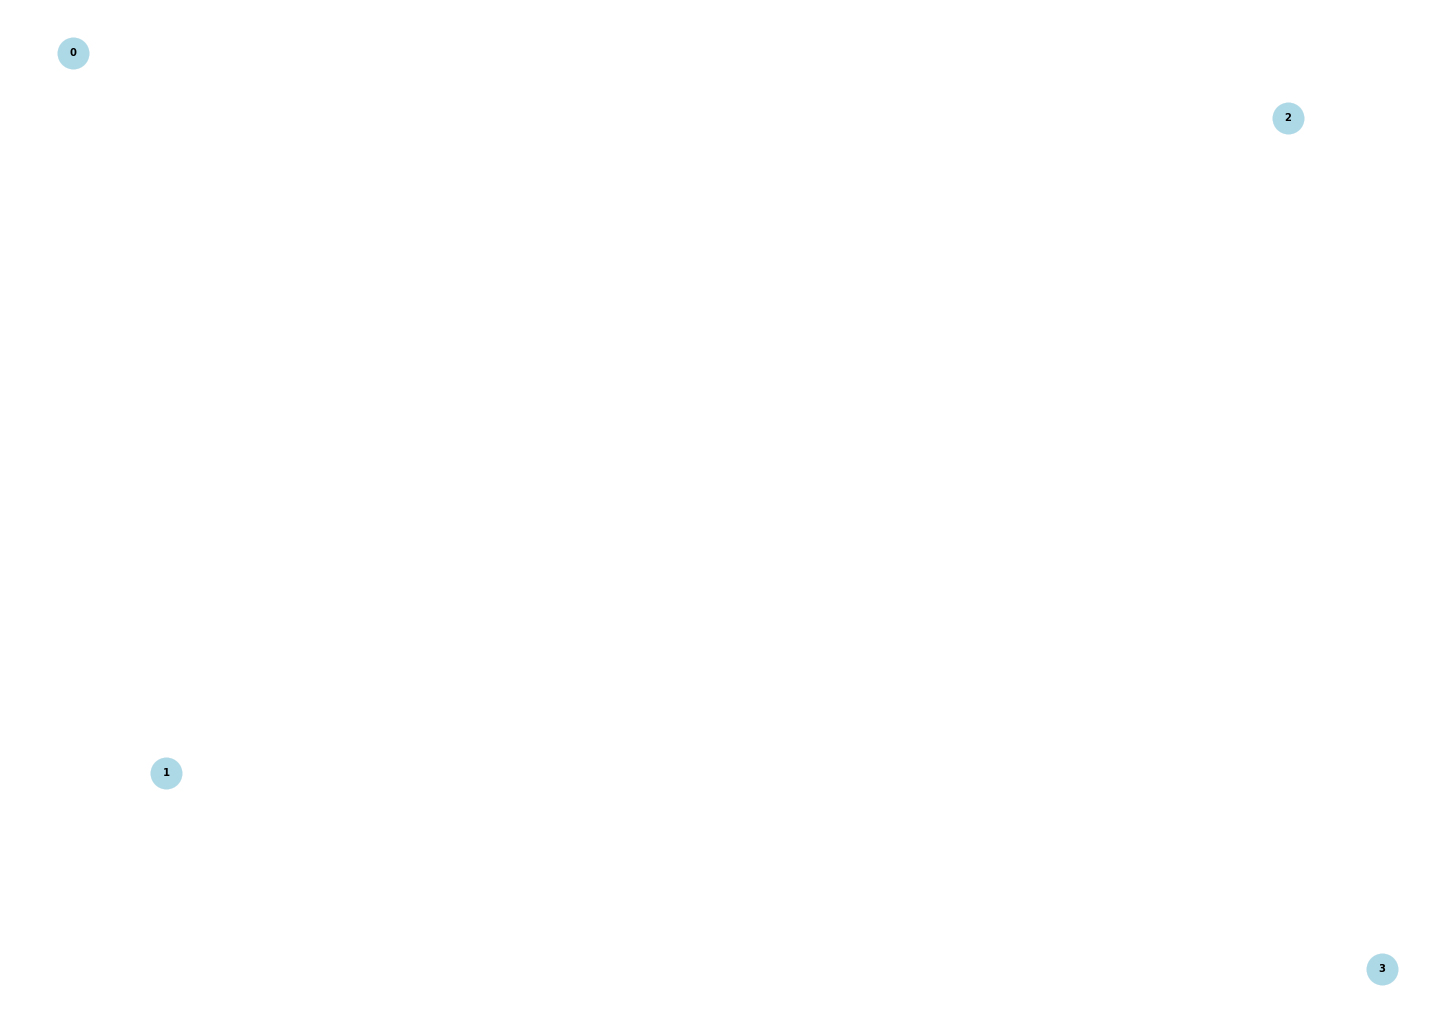

In [118]:
plt.figure(figsize=(20,14))
from networkx.drawing.nx_agraph import graphviz_layout
nx.draw(G, with_labels = True, pos = graphviz_layout(G), node_size=1000, node_color='lightblue', \
    linewidths=0.25, font_size=10, font_weight='bold',)
plt.show()

In [14]:
# Find all paths caterring the negative weights
paths = nx.johnson(G, weight='weight')
# pos = nx.nx_agraph.graphviz_layout(G)

In [15]:
# Generic function to calculate all paths between two nodes
for path in nx.all_simple_paths(G, source=1, target=5):
        print(path)

[1, 3, 5]


In [16]:
all_paths = []
for key, val in paths.items():
    for ke, va in val.items():
        all_paths.append(va)
lengths = [len(path) for path in all_paths]
sorted_paths = [path for _, path in sorted(zip(lengths, all_paths), reverse=True)]
longest_2_paths = sorted_paths[:2]

# Print the 2 longest paths
for i, path in enumerate(longest_2_paths):
    print(f"Longest path {i+1}: {path}")

Longest path 1: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
Longest path 2: [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38]


In [23]:
paths
G.edges

OutEdgeView([(0, 2), (1, 3), (2, 4), (3, 5), (4, 6), (5, 7), (6, 8), (7, 9), (8, 10), (9, 11), (10, 12), (11, 13), (12, 14), (13, 15), (14, 16), (15, 17), (16, 18), (17, 19), (18, 20), (19, 21), (20, 22), (21, 23), (22, 24), (23, 25), (24, 26), (25, 27), (26, 28), (27, 29), (28, 30), (29, 31), (30, 32), (31, 33), (32, 34), (33, 35), (34, 36), (35, 37), (36, 38), (37, 39)])

In [28]:
G.edges[(0,2)]['weight'] = 10

In [29]:
G.edges[(0,2)]['weight']

10